## Dự án 01: Xây dựng Raspberry PI thành máy tính cho Data Scientist (PIDS)
## Bài 06. Thử nghiệm Artificial Neural Network (ANN) với TensorFlow

##### Người soạn: Dương Trần Hà Phương
##### Website: [Mechasolution Việt Nam](https://mechasolution.vn)
##### Email: mechasolutionvietnam@gmail.com
---

[Tensorflow](https://tensorflow.org/) (TF) là một thư viện mã nguồn mở của Google đang rất được cộng đồng học thuật quan tâm, đặc biệt HOT trong lĩnh vực Deep Learning. TF được thiết kế để có khả năng tính toán dễ dàng trên các đồ thị tính toán hay các mạng nơron nhân tạo - Artificial Neural Network (ANN)

## Artifical  Neural Network (ANN) là gì ?

Mạng nơron nhân tạo là một trong những công cụ chính được sử dụng trong học máy. Từ "nơron" trong tên gọi được lấy cảm hứng từ bộ não của con người,  được thiết kế để bắt chước theo cách mà con người chúng ta học. Mạng nơron bao gồm nhiều lớp (layers):
* lớp đầu vào (input layer)
* lớp ẩn (hidden layer): Một lớp ẩn bao gồm các phép biến đổi lớp đầu vào thành thứ gì đó mà lớp đầu ra có thể sử dụng. 
* lớp đầu ra (output layer)

ANN là những công cụ tuyệt vời cho việc tìm kiếm kết quả trong các bài toán quá phức tạp hoặc quá nhiều đối với con người.

Ví dụ về ANN:

![Sample ANN](B05474_001.png)

## Giới thiệu Single Layer Perceptron (SLP)
SLP là mô hình Neural Network (NN) đầu tiền được đề xuất vào năm 1958 bởi Frank Rosenblatt. Hàm số xác định class của Perceptron là $label(x) = sgn(w^Tx)$ có thể được mô tả như hình vẽ (được gọi là network) dưới đây:

![Single Layer Perceptron](pla_nn.png)

Đầu vào của network $x$ được minh họa bằng các node màu xanh lục với node $x_0$ luôn luôn bằng 1. Tập hợp các node màu xanh lục được gọi là Input layer. Trong ví dụ này, tôi giả sử số chiều của dữ liệu $d=4$. Số node trong input layer luôn luôn là $d+1$ với một node là 1 được thêm vào. Node $x_0=1$ này đôi khi được ẩn đi.

Các trọng số (weights) $w_0, w_1,…,w_d$ được gán vào các mũi tên đi tới node $z = \sum_{i=0}^{d} w_ix_i = w^Tx$

Node $y = sgn(z)$ là output của network. Ký hiệu hình chữ Z ngược màu xanh trong node $y$ thể hiện đồ thị của hàm số $sgn$.

Hàm số $y = sgn(z)$ còn được gọi là activation function. Đây chính là dạng đơn giản nhất của Neural Network.

Các Neural Networks sau này có thể có nhiều node ở output tạo thành một output layer, hoặc có thể có thêm các layer trung gian giữa input layer và output layer. Các layer trung gian đó được gọi là hidden layer. Khi biểu diễn các Networks lớn, người ta thường giản lược hình bên trái thành hình bên phải. Trong đó node $x_0 = 1$ thường được ẩn đi. Node $z$ cũng được ẩn đi và viết gộp vào trong node $y$. Perceptron thường được vẽ dưới dạng đơn giản như hình bên dưới.

![Biểu diễn của Linear Regression dưới dạng Neural Network.](lr_nn.png)

## Các kiến thức liên quan
Trước khi bước qua phần cái đặt ANN với TensorFlow, ta sẽ tìm hiểu một số kiến thức liên quan có sử dụng trong ANN như: Activation function, Softmax function, Cross Entropy error

#### 1. Activation function
Một mỗi node của NN đóng vai trò như một nơron trong mạng nơron sinh học. Mỗi node hoạt động khi và chỉ khi tổng giá trị nó nhận được từ lớp trước đó vượt quá ngưỡng kích hoạt. Hàm số thực hiện việc đó gọi là **activation function**.

Một số **activation function** thông dụng như: ReLU (Rectified Linear Unit), Sigmoid, Tanh, Softmax.

#### 2. Softmax function
Trong toán học, hàm softmax, hoặc hàm trung bình mũ là sự khái quát hóa của hàm lôgit biến không gian K-chiều vector với giá trị thực bất kỳ đến không gian K-chiều vector mang giá trị trong phạm vi (0, 1] bao gồm cả giá trị 1.

Trong lý thuyết xác suất, giá trị xuất ra của hàm softmax có thể được sử dụng để đại diện cho một loại phân phối – đó là phân phối xác xuất trên K khả năng khác nhau có thể xảy ra. Trong thực tế, nó là gradien logarit chuẩn hóa thuộc nhóm phân phối xác suất.

![Mô hình Softmax Regression dưới dạng Neural network.](softmax_nn.png)


#### 3. Cross Entropy error
Cross entropy giữa hai phân phối $p$ và $q$ được định nghĩa là khoảng cách giữa hai phân phối xác suất với công thức: $H(p,q) = E_p[-logq]$

## Cài đặt ANN với TensorFlow

Bây giờ chúng ta sẽ bắt đầu làm một ví dụ tạo một ANN đơn giản với 3 lớp với TensorFlow. Trong ví dụ này, chúng ta sẽ sử dụng dataset MNIST, đây là dataset được TensorFlow cung cấp. Dataset MNIST là một tập hợp của 28x28 pixel ảnh grayscale của rất nhiều chữ số viết tay. Dataset này bao gồm 55,000 dòng cho training, 10,000 dòng cho testing và 5,000 dòng cho validation.

Chúng ta có thể load dataset bằng cách chạy 2 lệnh sau:

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Tham số `one_hot=True` sẽ biểu diễn nhãn bằng một vector với tất cả phần từ bằng 0 ngoại trừ phần tử có chỉ số (id) bằng với nhãn. Ví dụ: với nhãn "4" thì ta có vector "one hot" như sau: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

#### 1. Cài đặt tham số cho mô hình

Tiếp theo, chúng ta sẽ cài đặt những placeholder variables cho việc huấn luyện dữ liệu:

In [5]:
# Python optimisation variables
learning_rate = 0.5
epochs = 10
batch_size = 100

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

Lưu ý: x - input layer với 784 nodes thể hiện cho 28 x 28 (=784) pixels, và y - output layer với 10 nodes thể hiện 10 giá trị có thể của 10 chữ số (0, 1, 2, . . ., 9). Một lần nữa kích thước của x là (? x 784) với ? là một tham số chưa biết giá trị đầu vào, giá trị này sẽ thay đổi tuỳ thuộc vào placeholder variable.

Bây giờ chúng ta cần cài đặt biến trọng số và bias cho 3 lớp của ANN. Luôn có L-1 số lượng tensor thể hiện trọng số/bias, với L là số lớp. Vì vậy trong trường hợp này, ta cần cài đặt 2 tensors:

In [6]:
# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

Ok, so let’s unpack the above code a little.  First, we declare some variables for W1 and b1, the weights and bias for the connections between the input and hidden layer.  This neural network will have 300 nodes in the hidden layer, so the size of the weight tensor W1 is [784, 300].  We initialise the values of the weights using a random normal distribution with a mean of zero and a standard deviation of 0.03.  TensorFlow has a replicated version of the numpy random normal function, which allows you to create a matrix of a given size populated with random samples drawn from a given distribution.  Likewise, we create W2 and b2 variables to connect the hidden layer to the output layer of the neural network.

Next, we have to setup node inputs and activation functions of the hidden layer nodes:

In [7]:
# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

In the first line, we execute the standard matrix multiplication of the weights (W1) by the input vector x and we add the bias b1.  The matrix multiplication is executed using the tf.matmul operation.  Next, we finalise the hidden_out operation by applying a rectified linear unit activation function to the matrix multiplication plus bias.  Note that TensorFlow has a rectified linear unit activation already setup for us, tf.nn.relu.

This is to execute the following equations, as detailed in the neural networks tutorial:

$z^{(l+1)} = W^{(l)}x + b^{(l)}$

$h^{(l+1)} = f(z^{(l+1)})$

Now, let’s setup the output layer, y_:

In [8]:
# now calculate the hidden layer output - in this case, let's use a softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

Again we perform the weight multiplication with the output from the hidden layer (hidden_out) and add the bias, b2.  In this case, we are going to use a softmax activation for the output layer – we can use the included TensorFlow softmax function tf.nn.softmax.

We also have to include a cost or loss function for the optimisation / backpropagation to work on. Here we’ll use the cross entropy cost function, represented by:

$J = -\frac{1}{m} \sum_{i=1}^m \sum_{j=1}^n y_j^{(i)}log(y_j\_^{(i)}) + (1 – y_j^{(i)})log(1 – y_j\_^{(i)})$

Where $y_{j}^{(i)}$ is the ith training label for output node j, $y_j\_^{(i)}$ is the ith predicted label for output node j, m is the number of training / batch samples and n is the number .  There are two operations occurring in the above equation.  The first is the summation of the logarithmic products and additions across all the output nodes.  The second is taking a mean of this summation across all the training samples.  We can implement this cross entropy cost function in TensorFlow with the following code:

In [9]:
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

Some explanation is required.  The first line is an operation converting the output y_ to a clipped version, limited between 1e-10 to 0.999999.  This is to make sure that we never get a case were we have a log(0) operation occurring during training – this would return NaN and break the training process.  The second line is the cross entropy calculation.

To perform this calculation, first we use TensorFlow’s tf.reduce_sum function – this function basically takes the sum of a given axis of the tensor you supply.  In this case, the tensor that is supplied is the element-wise cross-entropy calculation for a single node and training sample i.e.: $y_j^{(i)}log(y_j\_^{(i)}) + (1 – y_j^{(i)})log(1 – y_j\_^{(i)})$.
Remember that y and y_clipped in the above calculation are (m x 10) tensors – therefore we need to perform the first sum over the second axis.  This is specified using the axis=1 argument, where “1” actually refers to the second axis when we have a zero-based indices system like Python.

After this operation, we have an (m x 1) tensor.  To take the mean of this tensor and complete our cross entropy cost calculation (i.e. execute this part $\frac{1}{m} \sum_{i=1}^m$), we use TensorFlow’s tf.reduce_mean function.  This function simply takes the mean of whatever tensor you provide it.  So now we have a cost function that we can use in the training process.

Let’s setup the optimiser in TensorFlow:

In [10]:
# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

Here we are just using the gradient descent optimiser provided by TensorFlow.  We initialize it with a learning rate, then specify what we want it to do – i.e. minimise the cross entropy cost operation we created.  This function will then perform the gradient descent (for more details on gradient descent see here and here) and the backpropagation for you.  How easy is that?  TensorFlow has a library of popular neural network training optimisers, see here.

Finally, before we move on to the main show, were we actually run the operations, let’s setup the variable initialisation operation and an operation to measure the accuracy of our predictions:

In [11]:
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

The correct prediction operation correct_prediction makes use of the TensorFlow tf.equal function which returns True or False depending on whether to arguments supplied to it are equal.  The tf.argmax function is the same as the numpy argmax function, which returns the index of the maximum value in a vector / tensor.  Therefore, the correct_prediction operation returns a tensor of size (m x 1) of True and False values designating whether the neural network has correctly predicted the digit.  We then want to calculate the mean accuracy from this tensor – first we have to cast the type of the correct_prediction operation from a Boolean to a TensorFlow float in order to perform the reduce_mean operation.  Once we’ve done that, we now have an accuracy operation ready to assess the performance of our neural network.

#### 2. Cài đặt cho quá trình huấn luyện (training)

We now have everything we need to setup the training process of our neural network.  I’m going to show the full code below, then talk through it:

In [26]:
import numpy as np

_epoch = np.array([0])
_acc = np.array([0])

# start the session
with tf.Session() as sess:
   # initialise the variables
   sess.run(init_op)
   total_batch = int(len(mnist.train.labels) / batch_size)

   for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _, c = sess.run([optimiser, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
            
        _epoch = np.append(_epoch, [epoch + 1])
        _acc = np.append(_acc, [avg_cost])

        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        
   print("Average accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 0.665
Epoch: 2 cost = 0.247
Epoch: 3 cost = 0.181
Epoch: 4 cost = 0.149
Epoch: 5 cost = 0.125
Epoch: 6 cost = 0.103
Epoch: 7 cost = 0.088
Epoch: 8 cost = 0.076
Epoch: 9 cost = 0.065
Epoch: 10 cost = 0.060
Average accuracy: 0.9729


Stepping through the lines above, the first couple relate to setting up the with statement and running the initialisation operation.  The third line relates to our mini-batch training scheme that we are going to run for this neural network.  If you want to know about mini-batch gradient descent, check out this post.  In the third line, we are calculating the number of batches to run through in each training epoch.  After that, we loop through each training epoch and initialise an avg_cost variable to keep track of the average cross entropy cost for each epoch.  The next line is where we extract a randomised batch of samples, batch_x and batch_y, from the MNIST training dataset.  The TensorFlow provided MNIST dataset has a handy utility function, next_batch, that makes it easy to extract batches of data for training.

The following line is where we run two operations.  Notice that sess.run is capable of taking a list of operations to run as its first argument.  In this case, supplying [optimiser, cross_entropy] as the list means that both these operations will be performed.  As such, we get two outputs, which we have assigned to the variables _ and c.  We don’t really care too much about the output from the optimiser operation but we want to know the output from the cross_entropy operation – which we have assigned to the variable c.  Note, we run the optimiser (and cross_entropy) operation on the batch samples.  In the following line, we use c to calculate the average cost for the epoch.

Finally, we print out our progress in the average cost, and after the training is complete, we run the accuracy operation to print out the accuracy of our trained network on the test set.  Running this program produces the following output:

There we go – approximately 98% accuracy on the test set, not bad.  We could do a number of things to improve the model, such as regularisation (see this tips and tricks post), but here we are just interested in exploring TensorFlow.  You can also use TensorBoard visualisation to look at things like the increase in accuracy over the epochs:

[0] [0]


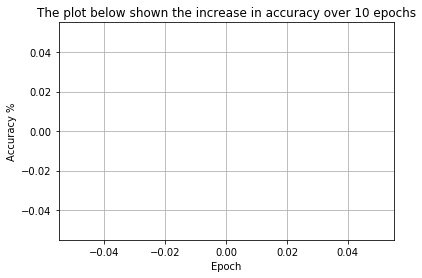

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

print(_epoch, _acc)
plt.plot(_epoch, _acc)

plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.title('The plot below shown the increase in accuracy over 10 epochs')
plt.grid(True)
plt.show()

## Tham khảo
[1] [Perceptron Learning Algorithm](https://machinelearningcoban.com/2017/01/21/perceptron/#-mo-hinh-neural-network-dau-tien)

[2] [Softmax Regression](https://machinelearningcoban.com/2017/01/21/perceptron/#-mo-hinh-neural-network-dau-tien)

[3] [Python TensorFlow Tutorial – Build a Neural Network](http://adventuresinmachinelearning.com/python-tensorflow-tutorial/)



---
Nếu có thắc mắc hoặc góp ý, các bạn hãy comment bên dưới để bài viết có thể được hoàn thiện hơn. 
Xin cảm ơn,

Hà Phương - Mechasolution Việt Nam.